# Antimalarial drug discovery using AI

This notebook exemplifies how several AI models could be used to filter a dataset to select the best antimalarial hits. It also focuses on understanding the differences between synthetic and natural product datasets

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

DATAPATH = "../data"
FIGUREPATH = "../figures"

/Users/gemmaturon/anaconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
ch = pd.read_csv(os.path.join(DATAPATH, "chembl_selected.csv"))
co = pd.read_csv(os.path.join(DATAPATH, "coconut_selected.csv"))

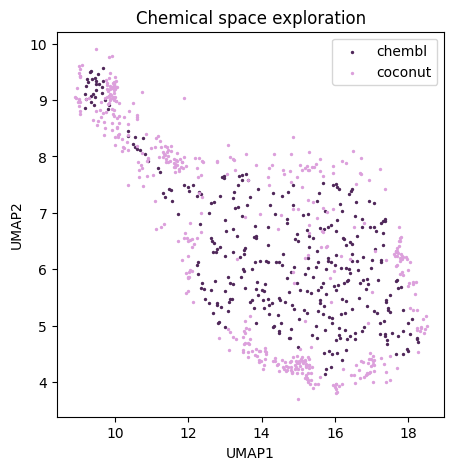

In [16]:
from lazyqsar.descriptors.descriptors import ErsiliaCompoundEmbeddings
from umap import UMAP

desc = ErsiliaCompoundEmbeddings()
ch_descs = desc.transform(ch["smiles"])
co_descs = desc.transform(co["smiles"])

reducer = UMAP()
umap_ch = reducer.fit_transform(ch_descs)
umap_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(umap_ch[:,0], umap_ch[:,1], c="#50285a", s=2, label="chembl")
ax.scatter(umap_co[:,0], umap_co[:,1], c="#dca0dc", s=2, label="coconut")
ax.set_title("Chemical space exploration")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"umap_chembl_coconut.png"), dpi=300)

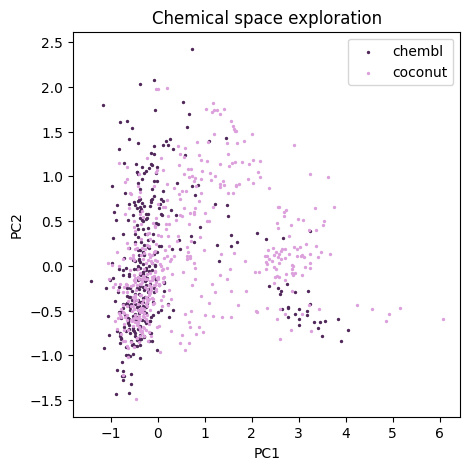

In [18]:
from sklearn.decomposition import PCA

desc = ErsiliaCompoundEmbeddings()
ch_descs = desc.transform(ch["smiles"])
co_descs = desc.transform(co["smiles"])

reducer = PCA(n_components=2)
pca_ch = reducer.fit_transform(ch_descs)
pca_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(pca_ch[:,0], pca_ch[:,1], c="#50285a", s=2, label="chembl")
ax.scatter(pca_co[:,0], pca_co[:,1], c="#dca0dc", s=2, label="coconut")
ax.set_title("Chemical space exploration")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"pca_chembl_coconut.png"), dpi=300)

# Results analysis

In [ ]:
import stylia as st
from stylia import NamedColors
from stylia import TWO_COLUMNS_WIDTH

named_colors = NamedColors()
red = named_colors.get('red')
blue = named_colors.get('blue')
gray = named_colors.get('gray')

### eos4rta

In [27]:
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_eos4rta_predictions.csv"))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_eos4rta_predictions.csv"))

cols = list(ch_preds.columns)
cols.remove('InChiKey')
cols.remove('SMILES')


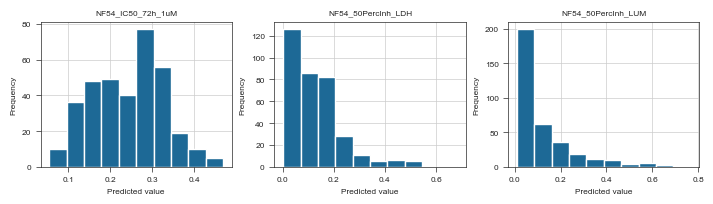

In [28]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"eos4rta_chembl_selected.png"), dpi=300)

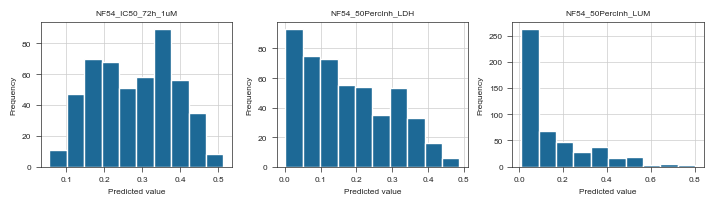

In [29]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"eos4rta_coconut_selected.png"), dpi=300)

### eos7yti

In [32]:
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_eos7yti_predictions.csv"))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_eos7yti_predictions.csv"))

cols = list(ch_preds.columns)
cols.remove('InChiKey')
cols.remove('SMILES')

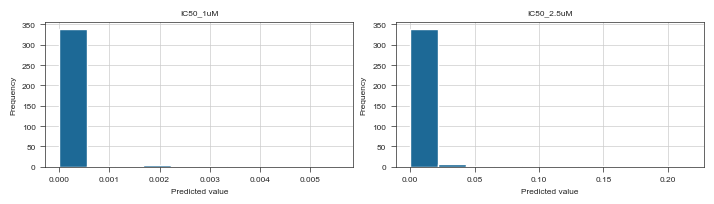

In [33]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"eos7yti_chembl_selected.png"), dpi=300)

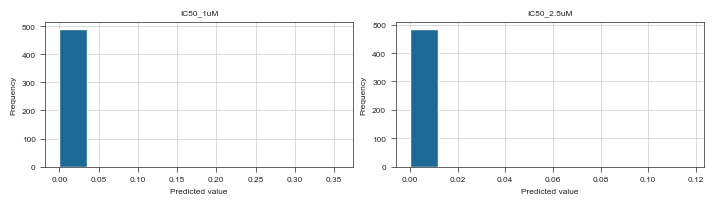

In [34]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"eos7yti_coconut_selected.png"), dpi=300)

In [ ]:
def filter_predictions_by_selected(source, model_id):
    sel_filename = "{0}_selected.csv".format(source)
    full_filename = "precalculations/{0}_50k_{1}.csv".format(source, model_id)
    keys = set(pd.read_csv(sel_filename)["inchikey"])
    df = pd.read_csv(full_filename)
    df = df[df["key"].isin(keys)].reset_index(drop=True)
    out_filename = "precalculations/{0}_selected_{1}_predictions.csv".format(source, model_id)
    df.to_csv(out_filename, index=False)

filter_predictions_by_selected("coconut")